# Incremental Word2Vec

## Word2Vec

Word2Vec is a popular and widely-used word embedding model that is trained on large amounts of text data to produce dense and continuous vector representations for words. These word vectors capture semantic and syntactic relationships between words and can be used for various natural language processing tasks, such as document classification, sentiment analysis, and machine translation.

Word2Vec operates by defining a neural network architecture that takes as input a target word and the context words that appear near it. The model trains on large amounts of text data to learn the relationships between words and their context, and uses this knowledge to generate continuous vector representations for each word in the vocabulary. These vectors are typically lower dimensional than the high-dimensional one-hot encoding used to represent words in traditional NLP models, making them more efficient to work with and easier to interpret.

There are two popular variants of Word2Vec: Continuous Bag of Words (CBOW) and Skip-gram. The choice of which model to use depends on the specific task at hand and the data being used.

### SkipGram

SkipGram is a popular word embedding model introduced by Mikolov et al. in 2013. The model predicts the context words given a target word in a text corpus. SkipGram aims to learn the representation of words that can capture the semantic and syntactic relationships between words.

The model defines a context window around the target word and then uses this context information to predict the target word. The SkipGram model trains a separate neural network for each target word that uses the surrounding context words as inputs and the target word as the output. During training, the model is optimized to maximize the probability of the correct target word given the surrounding context words.

The learned word representations are used as the input to other NLP tasks, such as document classification, sentiment analysis, and machine translation. SkipGram has become a popular method for learning word representations because of its simplicity and ability to capture the semantic and syntactic relationships between words.


### CBOW

The Continuous Bag of Words (CBOW) is a popular word embedding model in natural language processing. It is used to predict the target word based on its surrounding context words in a given sentence.

The model is trained on a large corpus of text data and uses a sliding window approach to construct the context around a target word. The context words are represented as one-hot vectors and are used as input to a neural network. The objective of the model is to predict the target word based on the context words, which are then used to compute the word embeddings.

CBOW is computationally efficient compared to other models such as Skip-Gram, as it predicts the target word from its context, rather than predicting the context from the target word. This makes it faster to train, especially when working with large corpora. The quality of the embeddings produced by CBOW can be further improved by considering more context words and adjusting the model hyperparameters.



<img src=" 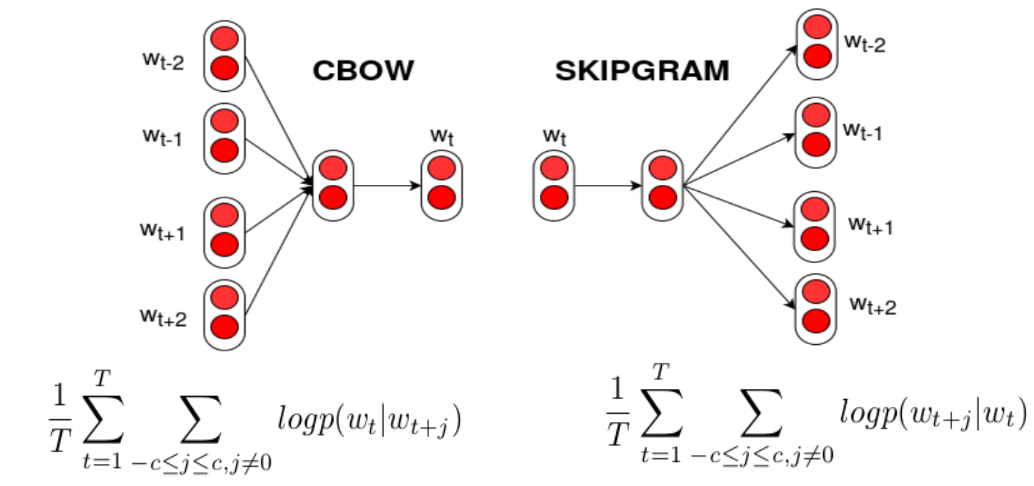">

### Negative Sampling

The Negative Sampling technique is a method for training word embedding models proposed by Mikolov et al. in their seminal work on word2vec. Negative sampling aims to make the model's training process more efficient by only updating the parameters for a small set of negative samples instead of computing the full softmax over all words in the vocabulary.

Each training instance comprises a target word and a set of context words in the negative sampling technique. The goal is to predict the probability of the target word given the context words. Rather than computing the softmax over the entire vocabulary, negative sampling randomly selects a set of negative samples or words that are not the target word. The model is then trained to maximize the probability of the target word given the context words and minimize the probability of the negative samples.

By focusing on a smaller set of negative samples, the negative sampling technique can significantly reduce the computational cost of training the model. This, in turn, allows for larger training datasets and more complex models, leading to more accurate word embeddings. However, despite its efficiency, the negative sampling technique does have some limitations, such as a potential loss of information about words that are not selected as negative samples.

### Incremental Word2Vec


Our implementation is based on the Skip Gram model with Negative Sampling, as proposed by Kaji and Kobayashi. This implementation extends the traditional unigram table, typically created as a static word array, to an incremental approach. Instead of performing multiple passes over the entire dataset to complete the unigram table, the model updates the table incrementally, making the process more efficient and scalable.

<img src=" 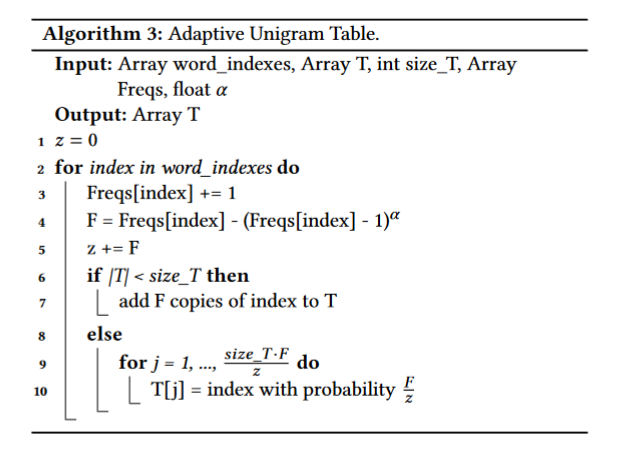">


In Algorithm 3, we present the adaptive unigram table proposed by Kaji and Kobayashi. Given a fixed-size unigram table T with a capacity of 𝑠𝑖𝑧𝑒_𝑇 , an array 𝐹𝑟𝑒𝑞𝑠 representing the frequencies of the words in the vocabulary, a tuple of word indexes representing a tweet, and a smoother parameter 𝛼.  The algorithm proceeds as follows:

* If the number of elements in $𝑇$ , $|𝑇|$, is less than $𝑠𝑖𝑧𝑒\_𝑇$ , $𝐹$ copies of the word index are added to $T$, where the word index corresponds to the indexes mapped to the words that compose the vocabulary.

* Otherwise, the number of copies of the word index added to $𝑇$ is calculated as $\frac{𝑠𝑖𝑧𝑒\_𝑇 \cdot 𝐹}{𝑧}$ , and the new additions to $𝑇$ may overwrite current values with a probability proportional to $\frac{𝐹}{𝑧}$ .

### Import Libraries

In [6]:
from rivertext.utils import TweetStream
from torch.utils.data import DataLoader

from rivertext.models import IWord2Vec

## Incremental SkipGram

### Load the Stream

In [26]:
ts1 = TweetStream("tweets.txt")
dataloader1 = DataLoader(ts1, batch_size=32)

### Define the model

In [27]:
isg = IWord2Vec(
    vocab_size=1_000_000, 
    unigram_table_size=100_000_000,
    window_size=3,
    sg=1,
    neg_samples_sum=3,
    emb_size=100, 
    device="cuda:1"
)

### Training loop

In [28]:
for tweets in dataloader1:
    isg.learn_many(tweets)

### Getting the embeddings

In [29]:
embs = isg.vocab2dict()

100%|██████████| 4008/4008 [00:00<00:00, 20125.40it/s]


In [31]:
embs['is']

array([ 0.06691893, -0.09973555, -0.15410756, -0.24302587,  0.21353425,
       -0.11236657,  0.05755431, -0.23544413, -0.2050937 , -0.06809278,
       -0.24826536,  0.3825721 , -0.25221378,  0.09658606, -0.13850427,
        0.11021072, -0.07625315, -0.2103865 , -0.31520143,  0.16023363,
        0.13802046, -0.15908235, -0.10114044,  0.09615213, -0.11188699,
        0.04130854,  0.0397473 , -0.1484173 , -0.24108826,  0.16015273,
        0.20252189, -0.23172289, -0.16618115, -0.46101862, -0.1628093 ,
       -0.0659901 , -0.31437606, -0.0976759 , -0.18436359,  0.20284028,
        0.11393225,  0.08230087, -0.263676  , -0.12939665,  0.02156331,
        0.23299964,  0.19813469, -0.34338135, -0.1550852 , -0.16005385,
       -0.16375114,  0.08722973,  0.10712938,  0.18703246, -0.16625413,
       -0.0606268 ,  0.10911779,  0.16566864,  0.1434581 , -0.22078687,
       -0.23870118,  0.15510699, -0.25949252,  0.06894469, -0.21354452,
       -0.18566144, -0.34530926,  0.06025456,  0.19429663, -0.07

## Incremental CBOW

### Load the Stream

In [5]:
ts2 = TweetStream("tweets.txt")
dataloader2 = DataLoader(ts2, batch_size=32)

### Define the model

In [32]:
icbow = IWord2Vec(
    vocab_size=1_000_000, 
    unigram_table_size=100_000_000,
    window_size=3,
    neg_samples_sum=3,
    emb_size=100, 
    device="cuda:1"
)

### Training loop

In [33]:
for tweets in dataloader2:
    icbow.learn_many(tweets)

### Getting the embeddings

In [36]:
embs2 = icbow.vocab2dict()

100%|██████████| 4008/4008 [00:00<00:00, 10224.04it/s]


In [37]:
embs2['is']

array([-0.05953688,  0.17378834,  0.07685746,  0.17350402,  0.10244861,
       -0.00533197,  0.15615225, -0.13039488, -0.17799939, -0.0070909 ,
       -0.16311702,  0.20283064,  0.03595429, -0.06205177, -0.13124073,
       -0.1673927 , -0.0869403 ,  0.17897962, -0.22573066,  0.06154415,
       -0.0483239 ,  0.09372315, -0.09648558, -0.06390231, -0.18738973,
        0.27091122, -0.22729045, -0.09957069, -0.09266731, -0.25944853,
       -0.08312298, -0.13811381,  0.18910293, -0.05561335,  0.21187836,
       -0.10371674, -0.01316103,  0.1350459 ,  0.20059814, -0.07703663,
        0.08012395, -0.09558898, -0.12418339,  0.1817797 ,  0.01831285,
       -0.11487377,  0.21392187, -0.16059884,  0.21712372,  0.09613308,
       -0.08134334,  0.1570019 , -0.14979136,  0.12211626, -0.15021136,
        0.1563461 ,  0.0958667 , -0.20633872,  0.15943487, -0.14743875,
        0.22702791, -0.10152576, -0.08238292,  0.1150958 , -0.07313565,
        0.10900524, -0.28312835,  0.3230261 ,  0.02243368, -0.07